In [23]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# define the function
def f(x):
    return x*x

In [25]:
# define gradient (function)
def grad(x):
    return 2*x

In [26]:
x0 = -1.5
f(x0)

2.25

In [27]:
grad(x0)

-3.0

In [28]:
alpha = 0.1
x1 = x0 - alpha*grad(x0)
x1

-1.2

In [30]:
# create a loop that moves opposite to gradient direction getting closer and closer to 0
# you can overshoot if your alpha (learning grade) is too big .1 or .01 are common 
# this outputs x values along the x axis
x = -1.5
for i in range(10):
    print(x)
    x = x - alpha*grad(x)
print("final", x)

-1.5
-1.2
-0.96
-0.768
-0.6144000000000001
-0.49152000000000007
-0.39321600000000007
-0.31457280000000004
-0.25165824000000003
-0.20132659200000003
final -0.16106127360000003


In [33]:
# this is outputting y values as well
alpha = 0.3
x = -1.5
for i in range(10):
    print("x= %6.4f" % x, "y = %6.4f" % f(x))
    x = x - alpha*grad(x)
print("final", x)

x= -1.5000 y = 2.2500
x= -0.6000 y = 0.3600
x= -0.2400 y = 0.0576
x= -0.0960 y = 0.0092
x= -0.0384 y = 0.0015
x= -0.0154 y = 0.0002
x= -0.0061 y = 0.0000
x= -0.0025 y = 0.0000
x= -0.0010 y = 0.0000
x= -0.0004 y = 0.0000
final -0.00015728640000000016


In [36]:
hubble = pd.read_csv('/Users/jennyskytta/Desktop/hubble.csv', sep="\t")
hubble

,object,ms,R,v,mt,Mt,D,Rmodern,vModern
0,S.Mag.,..,0.032,170,1.5,-16.0,0.03,0.061700,158.1
1,L.Mag.,..,0.030,290,0.5,-17.2,0.03,0.049970,278.0
2,N.G.C.6822,..,0.214,-130,9.0,-12.7,0.22,0.500000,-57.0
3,598,..,0.263,-70,7.0,-15.1,0.26,0.840000,-179.0
4,221,..,0.275,-185,8.8,-13.4,0.28,0.763000,-200.0
5,224,..,0.275,-220,5.0,-17.2,0.28,0.778000,-301.0
6,5457,17,0.450,200,9.9,-13.3,0.44,6.400000,241.0
7,4736,17.3,0.500,290,8.4,-15.1,0.50,4.910000,308.0
8,5194,17.3,0.500,270,7.4,-16.1,0.50,9.509202,463.2
9,4449,17.8,0.630,200,9.5,-14.5,0.63,3.600000,204.0


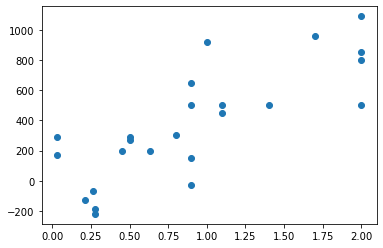

In [37]:
plt.scatter(hubble.R, hubble.v)
# this shows us that the universe is expanding and these used to all be together 

In [38]:
# calculate SSE Sum of Square Error
# SSE(m,c)= E(yi-yhat)^2
# pick two values and calculate SSE 
# predicted velocity = slope * distince + intercept (m*R + c)
#hat means predicted vhat is predicted velocity 

m0 = 1 # value for slope
c0 = 0 # value for intercept

vhat = m0*hubble.R + c0
vhat

0     0.032
1     0.030
2     0.214
3     0.263
4     0.275
5     0.275
6     0.450
7     0.500
8     0.500
9     0.630
10    0.800
11    0.900
12    0.900
13    0.900
14    0.900
15    1.000
16    1.100
17    1.100
18    1.400
19    1.700
20    2.000
21    2.000
22    2.000
23    2.000
Name: R, dtype: float64

In [40]:
np.sum((hubble.v - vhat)**2)

6486429.447539

### Sum of Square Errors

In [61]:
vhat = m0*hubble.R + c0
np.sum((hubble.v - vhat)**2)

def sse(theta):
    m = theta[0]
    c = theta[1]
    vhat = m*hubble.R + c
    sse = np.sum((hubble.v - vhat)**2)
    return sse
sse(np.array([1,0]))

6486429.447539

In [81]:
# define SSE
# we see the output is the same as our previous SSE line above
# error multipled by distance (e*hubble.R)
# axis tells it to be left and right
#.values makes this into matrix 
#.sum tells us we have two columns
# vector contains two variables: slope and intercept

def grad(theta):
    m = theta[0]
    c = theta[1]
    vhat = m*hubble.R + c  # predicted velocity 
    e = hubble.v - vhat  #error equals..
    grad = -2*pd.concat((e*hubble.R, e), axis=1).values.sum(axis=0) # gradient formula 
    return grad

grad(np.array([1,0]))

array([-24966.034922, -17866.262   ])

In [65]:
m0 = 1
c0 = 0
# put slope and intercept into a single vector
theta0 = np.array([m0, c0])

In [67]:
alpha = 0.1
grad(theta0)

array([24966.034922, 17866.262   ])

In [55]:
-alpha*grad(theta0) #step downhill

array([-2496.6034922, -1786.6262   ])

In [59]:
theta1 = theta0 - alpha*grad(theta0)
theta1

array([-2495.6034922, -1786.6262   ])

In [68]:
sse(theta1) # calculted a new SSE and is this better or worse than our original 

556422750.9836766

In [69]:
sse(theta0) # this number is higher showing we are going uphill instead of downhill
# lets try a smaller alpha 

6486429.447539

In [83]:
alpha = 0.01
theta1 = theta0 - alpha*grad(theta0)
print(theta1)
print(sse(theta1))

# if I get a smaller SSE number, I am good

[250.66034922 178.66262   ]
1618224.2695295308


In [90]:
# cost function is now SSE
# this is essence of gradient descent
# this can be our final formula 
alpha = 0.01
theta = np.array([1,0])  # this is our initial parameter containing our slope and intercept

for i in range(18):
    print("theta:", theta, "sse = %6.4f" % sse(theta))
    theta = theta - alpha*grad(theta)
print("final", theta)

theta: [1 0] sse = 6486429.4475
theta: [250.66034922 178.66262   ] sse = 1618224.2695
theta: [274.79005981 162.37073886] sse = 1539819.8134
theta: [291.8005199  143.34510785] sse = 1477760.0994
theta: [307.0902721  126.01174469] sse = 1426857.5300
theta: [320.93497355 110.31096402] sse = 1385105.2042
theta: [333.47365214  96.09116256] sse = 1350858.2739
theta: [344.82956881  83.21269856] sse = 1322767.5698
theta: [355.1142938   71.54904645] sse = 1299726.4490
theta: [364.42887153  60.98561433] sse = 1280827.1987
theta: [372.86481497  51.41861962] sse = 1265325.2765
theta: [380.50500477  42.75406943] sse = 1252609.9789
theta: [387.42450352  34.90683712] sse = 1242180.3824
theta: [393.69129326  27.79982595] sse = 1233625.6096
theta: [399.36694333  21.36321165] sse = 1226608.6422
theta: [404.50721532  15.53375638] sse = 1220853.0444
theta: [409.16261087  10.25418748] sse = 1216132.0726
theta: [413.37886787   5.47263475] sse = 1212259.7424
final [417.1974098    1.14212084]
